<a href="https://colab.research.google.com/github/Anjali2277/Anjali/blob/main/Copy_of_%3CRoll_No_%3E_%3CFull_Name%3E_MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

1. Are there any missing values and duplicate records in the  dataset?How will you identify and handle them? Can you identify any other inconsistencies or errors in the data that require cleaning or validation?

In [252]:
data = !weget '/content/placement_data.csv'

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
df = pd.read_csv('/content/placement_data.csv')
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)
duplicate_records = df.duplicated()
print("Duplicate Records:")
print(duplicate_records)


Missing Values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64
Duplicate Records:
0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Length: 215, dtype: bool


2.What is the distribution of placement status based on different categorial variables? Are there any significant differences or patterns in the placement rates among different groups? Can we identify any correlation between specific independent variables and placement status?

In [255]:
import pandas as pd

In [256]:
df = pd.read_csv('/content/placement_data.csv')

In [257]:
print(df.columns)
placement_by_gender = df['status'].groupby(df['gender']).value_counts(normalize=True)
print("Placement Status Distribution by Gender:")
print(placement_by_gender)

placement_by_specialisation = df['status'].groupby(df['specialisation']).value_counts(normalize=True)
print("Placement Status Distribution by Specialisation:")
print(placement_by_specialisation)

correlation_matrix =df[['degree_t','workex']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')
Placement Status Distribution by Gender:
gender  status    
F       Placed        0.631579
        Not Placed    0.368421
M       Placed        0.719424
        Not Placed    0.280576
Name: status, dtype: float64
Placement Status Distribution by Specialisation:
specialisation  status    
Mkt&Fin         Placed        0.791667
                Not Placed    0.208333
Mkt&HR          Placed        0.557895
                Not Placed    0.442105
Name: status, dtype: float64
Correlation Matrix:
Empty DataFrame
Columns: []
Index: []


<ipython-input-257-1d826af41f9d>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =df[['degree_t','workex']].corr()


3. How does the distribution of secondary and higher secondary school percentages vary among the placed and not placed students? Can you identify any significant differences or patterns?

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

In [259]:
df = pd.read_csv('/content/placement_data.csv')

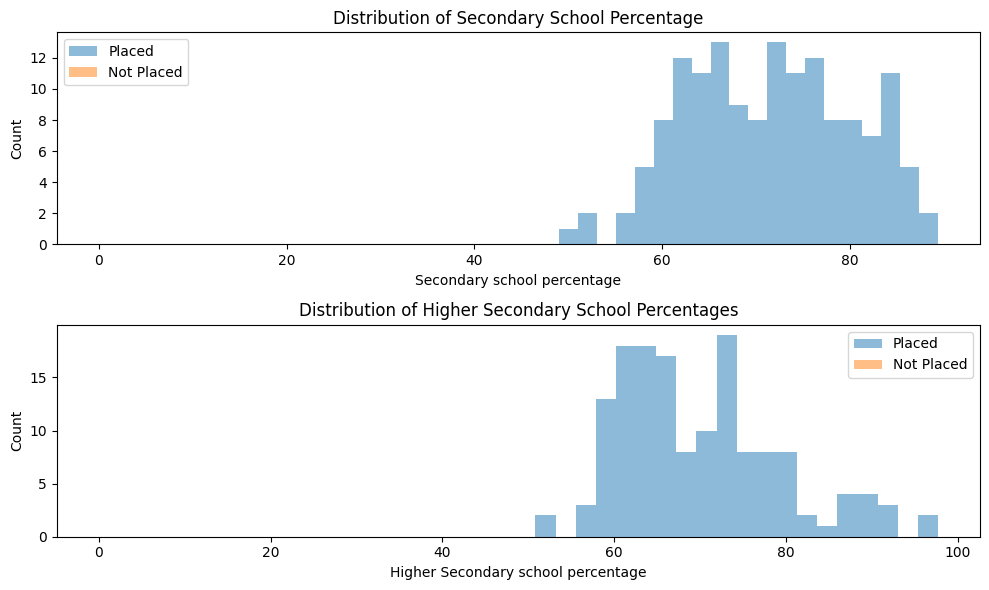

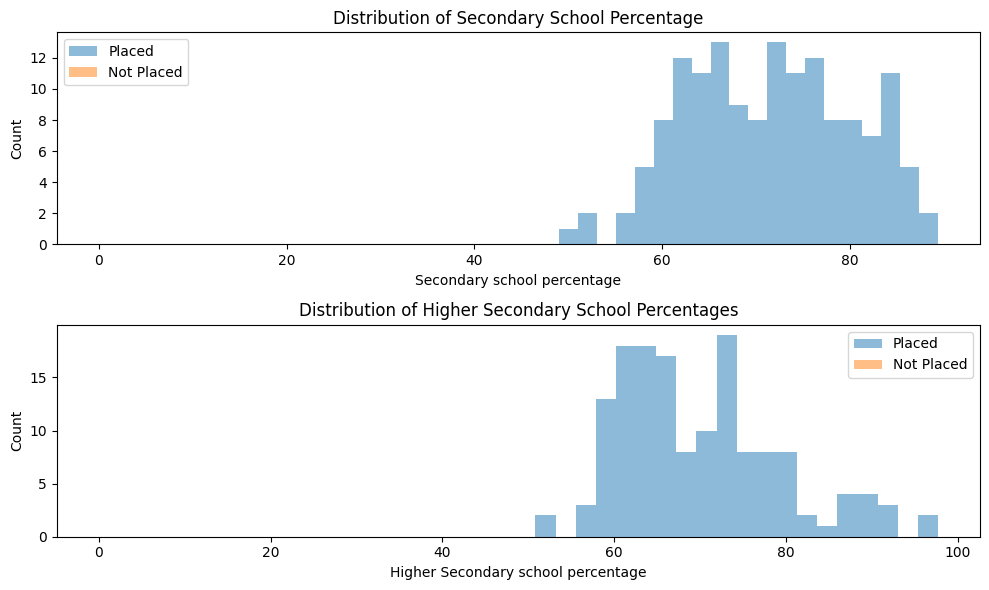

In [260]:
placed_students = df[df['status']== 'Placed']
not_placed_students = df[df['status']=='Not placed']
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.hist(placed_students['ssc_p'],bins=20,alpha=0.5,label='Placed')
plt.hist(not_placed_students['ssc_p'],bins=20,alpha=0.5, label='Not Placed')
plt.xlabel('Secondary school percentage')
plt.ylabel('Count')
plt.title('Distribution of Secondary School Percentage')
plt.legend()

plt.subplot(2,1,2)
plt.hist(placed_students['hsc_p'],bins=20,alpha=0.5,label='Placed')
plt.hist(not_placed_students['hsc_p'],bins=20,alpha=0.5,label='Not Placed')
plt.xlabel('Higher Secondary school percentage')
plt.ylabel('Count')
plt.title('Distribution of Higher Secondary School Percentages')
plt.legend()
plt.tight_layout()
plt.show('')

What is the distribution of the salary offers for placed students?
What are the minimum,maximum,mean,and median salary values?Are there any notable patterns or outliers in the data? Perform required visualisation.

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
df = pd.read_csv('/content/placement_data.csv')

Minimum Salary Offer: 200000.0
Maximum Salary Offer: 940000.0
Mean Salary Offer: 288655.4054054054
Median Salary Offer: 265000.0


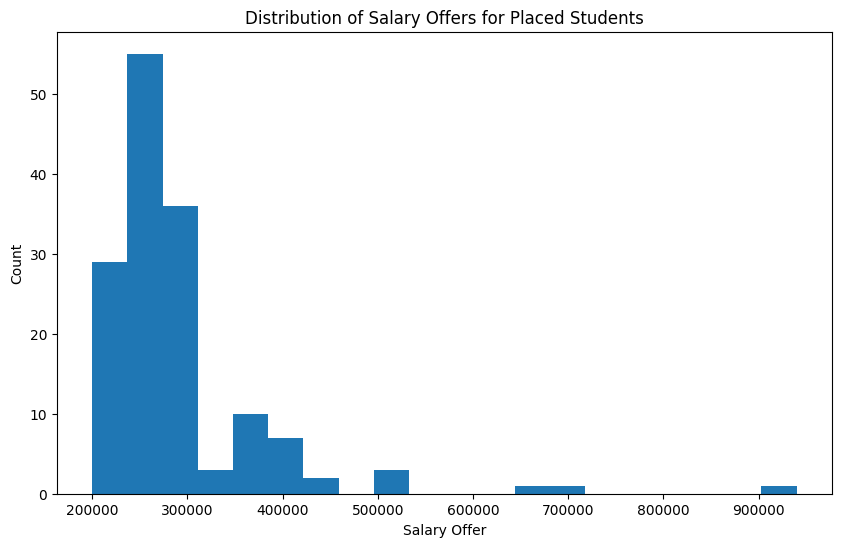

In [263]:
placed_students = df[df['status']== 'Placed']
salary_offers = placed_students['salary']
minimum_salary =  salary_offers.min()
maximum_salary = salary_offers.max()
mean_salary = salary_offers.mean()
median_salary = salary_offers.median()

print("Minimum Salary Offer:",minimum_salary)
print("Maximum Salary Offer:", maximum_salary)
print("Mean Salary Offer:", mean_salary)
print("Median Salary Offer:", median_salary)

plt.figure(figsize=(10,6))
plt.hist(salary_offers, bins=20)
plt.xlabel('Salary Offer')
plt.ylabel('Count')
plt.title('Distribution of Salary Offers for Placed Students')
plt.show()

5. How can we preprocess and normalize the data? Are there any notable patterns or outliers in the data? How data normalization will help you in model training and prediction

In [264]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [265]:
df = pd.read_csv('/content/placement_data.csv')

In [266]:
x = df.drop('status',axis=1)
y= df['status']
x = x.fillna(x.mean())

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<ipython-input-266-c73d2a2ffaec>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = x.fillna(x.mean())


ValueError: ignored

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices

